In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('india_only.csv')
print("India Dataset has been read.")

India Dataset has been read.


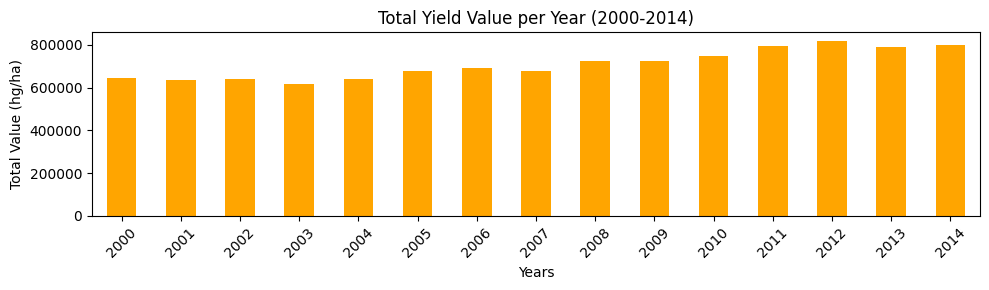

In [29]:
# Bar Chart
#Total Yield (hg/ha) from Year 2000 to 2014
yrs_filter = df[(df['Year'] >= 2000) & (df['Year'] <= 2014)]
df_year = yrs_filter.groupby('Year')['Value'].sum()

plt.figure(figsize=(10, 3))
df_year.plot(kind='bar', color='orange')
plt.title('Total Yield Value per Year (2000-2014)')
plt.xlabel('Years')
plt.ylabel('Total Value (hg/ha)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

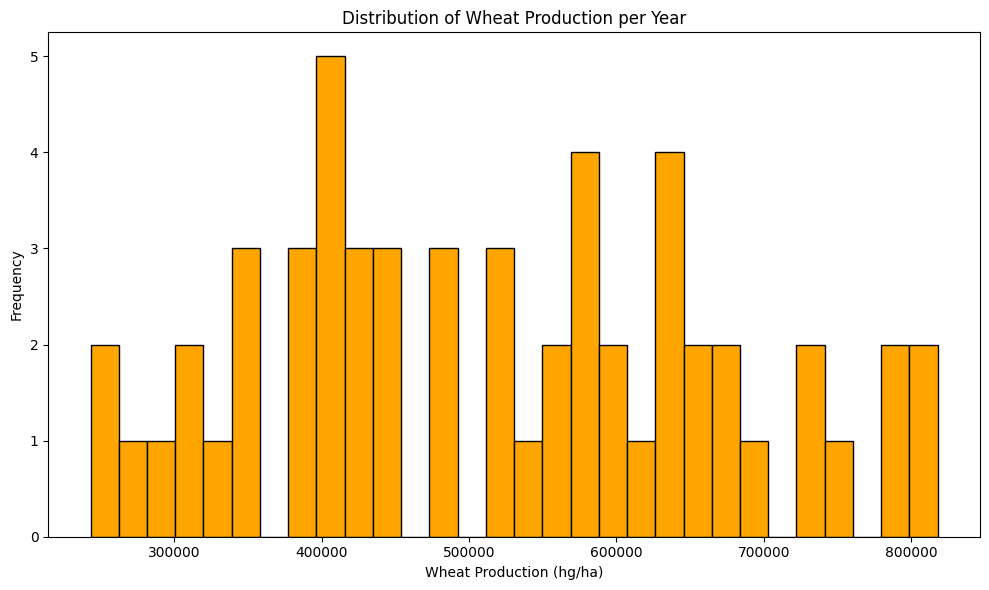

In [42]:
# Group by Year and sum the 'Value' for each year
df_yearly_production = df.groupby('Year')['Value'].sum()

# Plot a histogram of the yearly wheat production
plt.figure(figsize=(10, 6))
plt.hist(df_yearly_production, bins=30, color='orange', edgecolor='black')
plt.title('Distribution of Wheat Production per Year')
plt.xlabel('Wheat Production (hg/ha)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

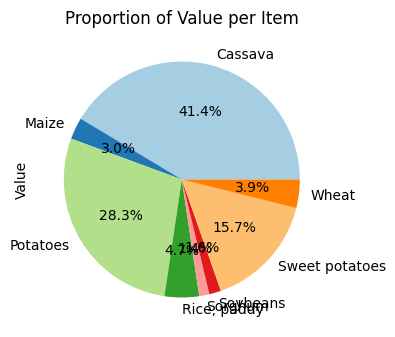

In [39]:
# Group by Item and sum the values
df_item = df.groupby('Item')['Value'].sum()

# Plot the pie chart
plt.figure(figsize=(4, 4))
df_item.plot(kind='pie', autopct='%1.1f%%', colors=plt.cm.Paired.colors)
plt.title('Proportion of Value per Item')
plt.tight_layout()
plt.show()

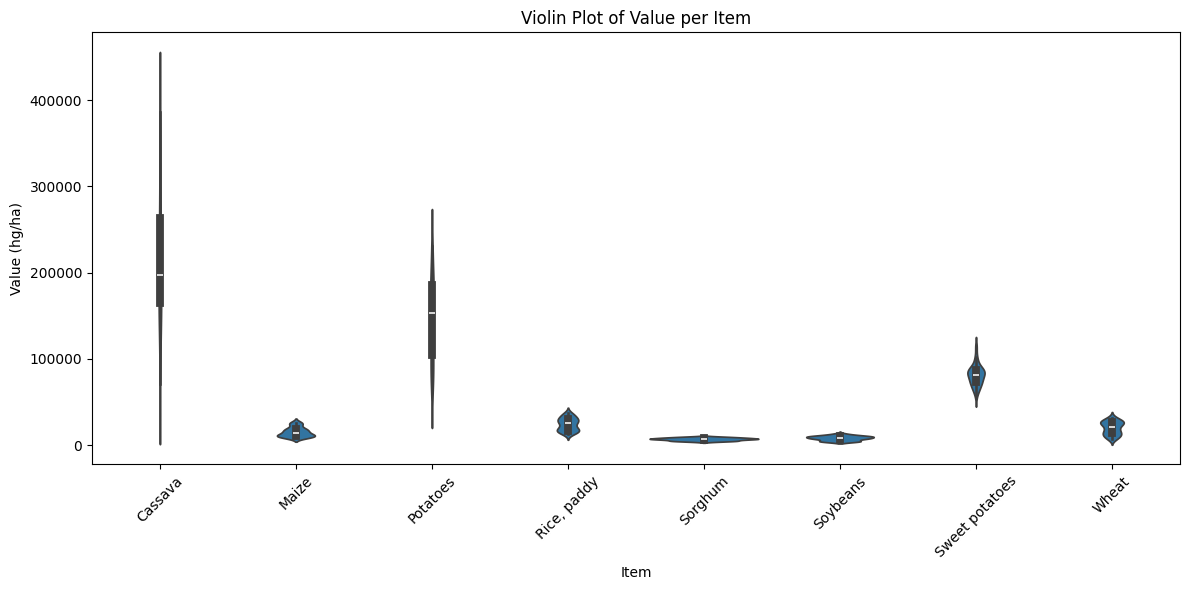

In [45]:
#Violin Plot
# Create a violin plot to visualize distribution of value by item

plt.figure(figsize=(12, 6))
sns.violinplot(x='Item', y='Value', data=df)
plt.title('Violin Plot of Value per Item')
plt.xlabel('Item')
plt.ylabel('Value (hg/ha)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

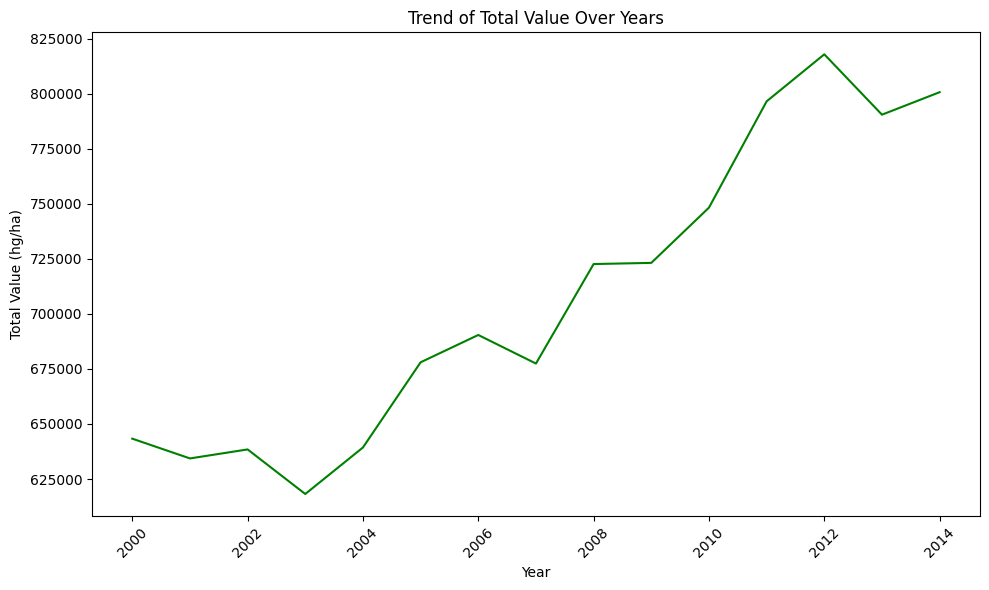

In [46]:
#Line Graph
# Group by Year and sum the values (similar to bar graph but we use a line plot)
plt.figure(figsize=(10, 6))
df_year.plot(kind='line', color='green')
plt.title('Trend of Total Value Over Years')
plt.xlabel('Year')
plt.ylabel('Total Value (hg/ha)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

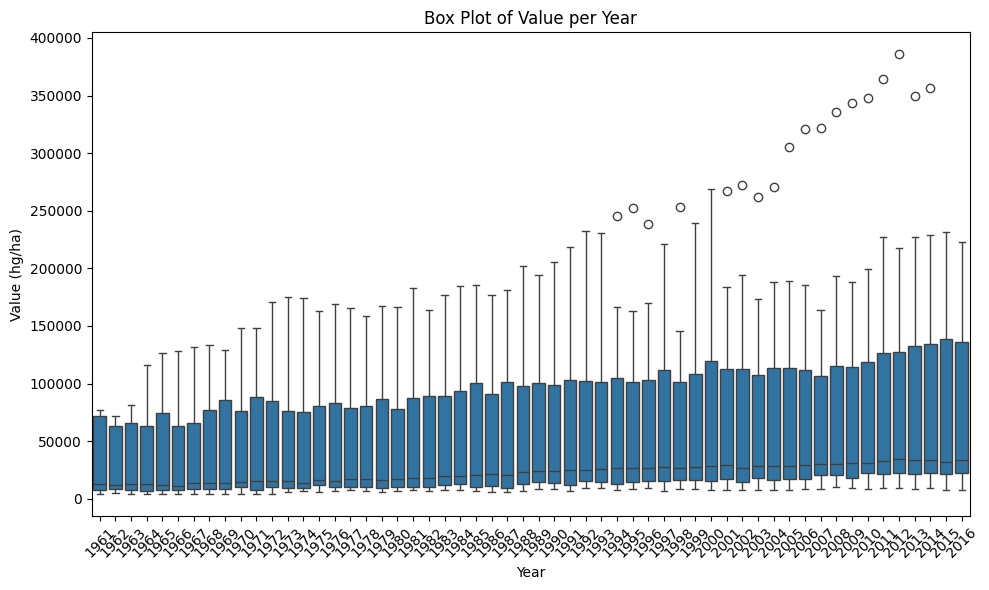

In [48]:
#Box Plot
# Create a box plot to visualize distribution of values across different years
plt.figure(figsize=(10, 6))
sns.boxplot(x='Year', y='Value', data=df)
plt.title('Box Plot of Value per Year')
plt.xlabel('Year')
plt.ylabel('Value (hg/ha)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

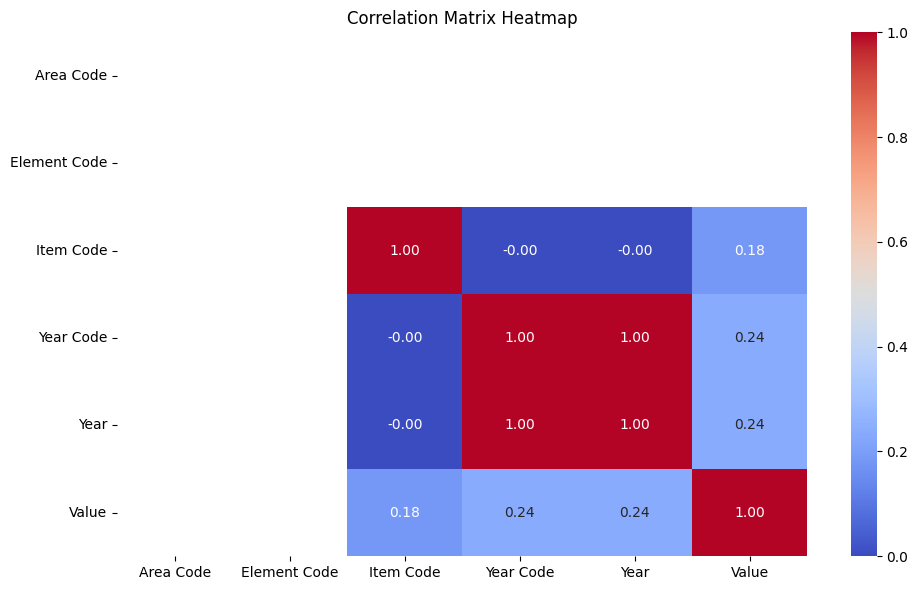

In [50]:
#Heat Map
# Select only numeric columns for correlation
df_numeric = df.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = df_numeric.corr()

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.tight_layout()
plt.show()

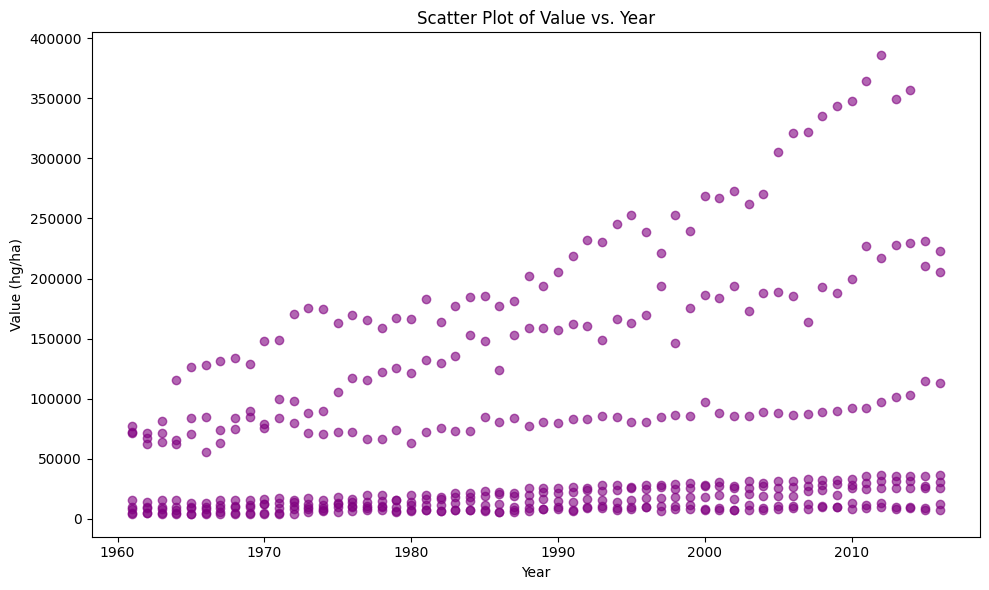

In [52]:
# Scatter plot for Value vs. Year
plt.figure(figsize=(10, 6))
plt.scatter(df['Year'], df['Value'], alpha=0.6, color='purple')
plt.title('Scatter Plot of Value vs. Year')
plt.xlabel('Year')
plt.ylabel('Value (hg/ha)')
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

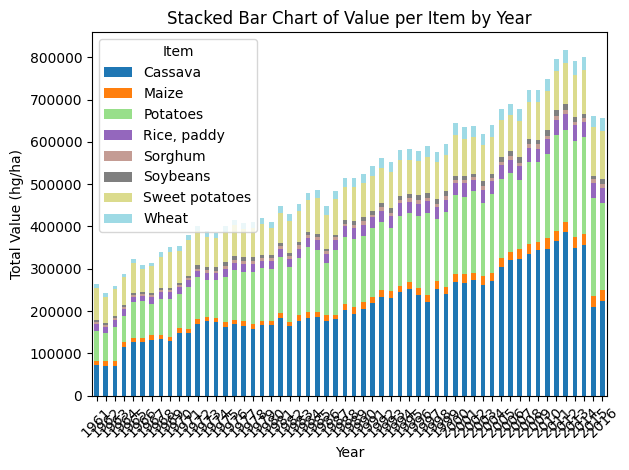

In [53]:
# Group by Year and Item, and sum the values
df_year_item = df.groupby(['Year', 'Item'])['Value'].sum().unstack()

# Plot the stacked bar chart
plt.figure(figsize=(12, 6))
df_year_item.plot(kind='bar', stacked=True, colormap='tab20')
plt.title('Stacked Bar Chart of Value per Item by Year')
plt.xlabel('Year')
plt.ylabel('Total Value (hg/ha)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()